Computer Vision Object Dectection

Computer Vision API를 사용해서 이미지속에 있는 사물을 인식하는 데모 입니다.

네트워크 통신을 위해서 requests 패키지를 import 합니다.

In [ ]:
import requests

이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.

matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [ ]:
import json

Subscription Key와 접속에 필요한 URL을 설정합니다.

In [ ]:
subscription_key = ''
vision_base_url = 'https://labuser1computervision.cognitiveservices.azure.com/vision/v2.0/'

In [ ]:
analyze_url = vision_base_url + 'analyze' #vision_base_url주소 맨뒤에 analyze가 붙어서 분석을 하게 도와줌.
print(analyze_url)

https://labuser1computervision.cognitiveservices.azure.com/vision/v2.0/analyze


분석에 사용되는 이미지를 확인 합니다.

In [ ]:
image_url = 'https://post-phinf.pstatic.net/MjAxOTA3MTlfMjc5/MDAxNTYzNTIwMjUwMTAy.TyelXRIL1fWfC3iIMRlmscacrczS_TY4jPth8cE2IUEg.XmARSvGW_mJr91jzdLx2oRG9RTJCwvwRgrtVopAyoPAg.JPEG/50.jpg?type=w1200'

In [ ]:
con = requests.get(image_url).content
byte = BytesIO(con)
image = Image.open(byte)

#image = Image.open(BytesIO(requests.get(image_url).content)) 한줄로

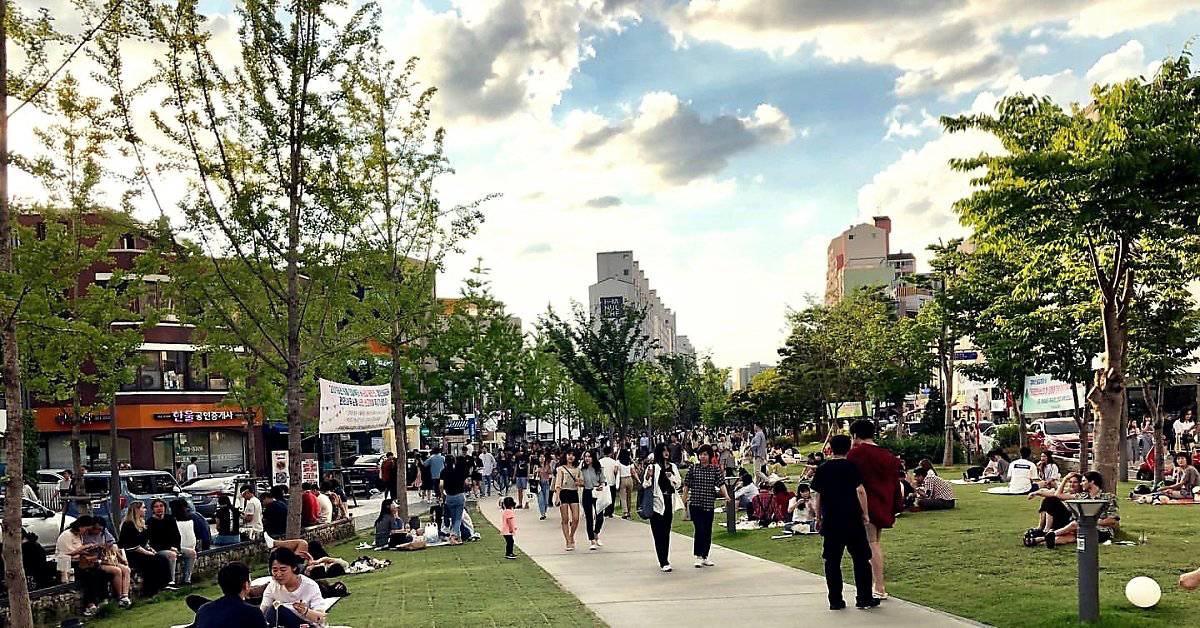

In [ ]:
image

In [ ]:
headers = {'Ocp-Apim-Subscription-key' : subscription_key}
params  = {'visualFeatures' : 'Categories,Description,Color'}
data = {'url' : image_url}

In [ ]:
response = requests.post(analyze_url, headers = headers, params = params, json = data)    #웹에서 호출하는 방식 get 또는 post

In [ ]:
result = response.json()

In [ ]:
result

In [ ]:
image_caption = result['description']['captions'][0]['text'] #제이슨 구조에서 원하는 리소스 추출하는법

In [ ]:
image_caption

'a group of people walking in a park'

Object Detection

In [ ]:
objectDetection_url = vision_base_url + 'detect'

In [ ]:
image_url = 'https://image-notepet.akamaized.net/seimage/20211129%2F707abaa471d0e275cd61dceec851c6e4.jpg'

In [ ]:
image = Image.open(BytesIO(requests.get(image_url).content))

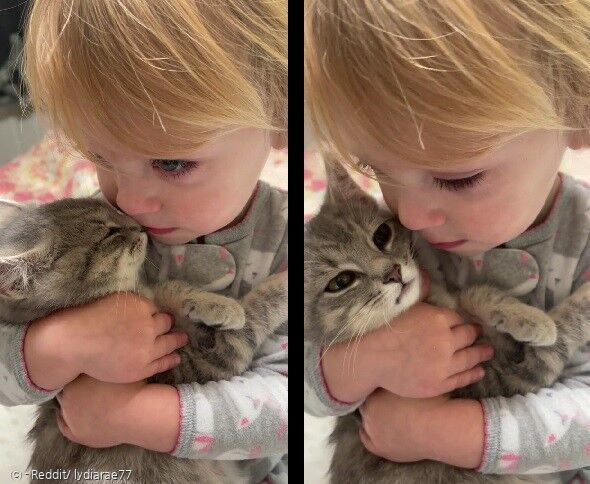

In [ ]:
image

In [ ]:
headers = {'Ocp-Apim-Subscription-key' : subscription_key}
params  = {'visualFeatures' : 'Categories,Description,Color'}
data = {'url' : image_url}

In [ ]:
response = requests.post(objectDetection_url, headers = headers, params = params, json = data)

In [ ]:
result = response.json()
result

In [ ]:
from PIL import Image, ImageDraw, ImageFont

draw = ImageDraw.Draw(image)    #위에서 만든 패키지 내용이 이미지 드로우(위의 그림을 그리기모드로 여는 방법)

In [ ]:
# boundingBox를 위한 함수
def DrawBox(detectData):
  objects = detectData['objects']

  for obj in objects: #object 내의 내용들이 for문에 의해 요소의 갯수만큼 반복적으로 출력
    #print(obj)

    rect = obj['rectangle']
    print(rect)

    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x,y),(x+w,y+h)),outline='red')

    objectName = obj['object']
    draw.text((x,y),objectName,fill='red')
    

In [ ]:
DrawBox(result) #반복출력이 되는지 확인

{'x': 308, 'y': 0, 'w': 279, 'h': 332}
{'x': 8, 'y': 0, 'w': 282, 'h': 427}
{'x': 0, 'y': 179, 'w': 214, 'h': 290}
{'x': 302, 'y': 158, 'w': 288, 'h': 323}


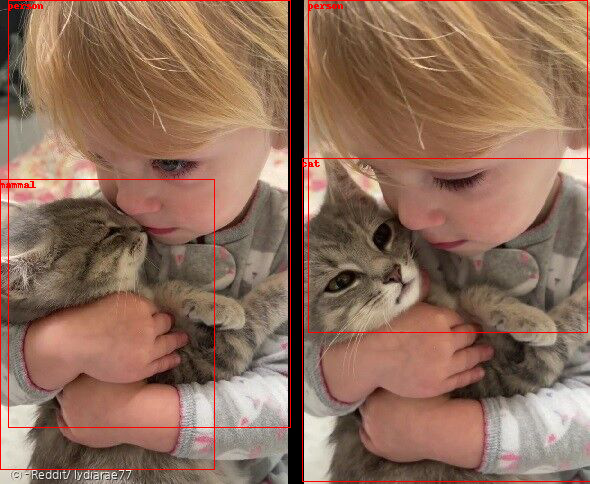

In [ ]:
image